# Neural Network Overview
- neural network had an extra step of computation
- square bracket superscript is referring to layer
- roung bracket superscript is referring to training example

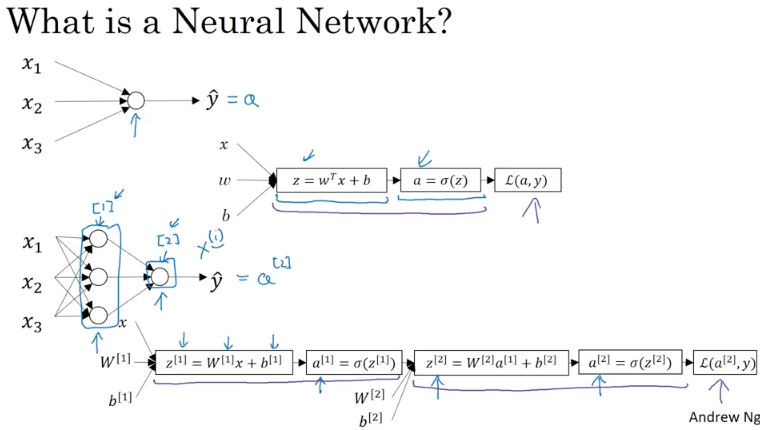

In [5]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-10-27 at 10.12.08 AM.png')

- Input layer -x1, x1,x3
- Hidden layer
- Output layer - y
- $$a^{[0]} = x$$ first layer
- $$a^{[1]} = x$$ second layer four hidden units
-- $$\hat{y} = a^{[2]}$$
- 2 layer NN only count hidden layer and output layer, do not count input layer
- hidden layer has $$w^{[1]}$$ (4,3) and $$b^{[1]}$$ (4,1)
- output layer has $$w^{[2]}$$ (1,4) and $$b^{[2]}$$ (1,1)

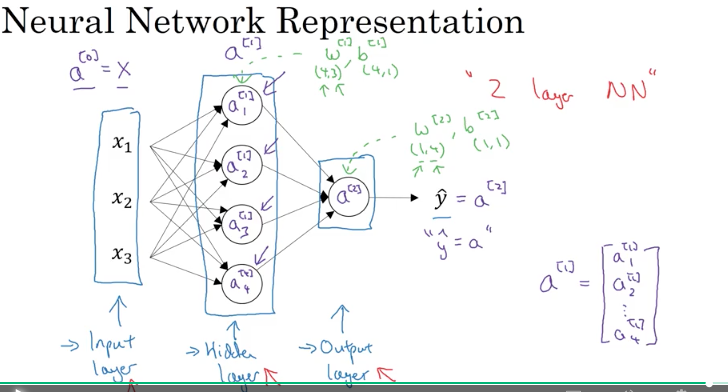

In [1]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-10-27 at 10.42.30 AM.png')

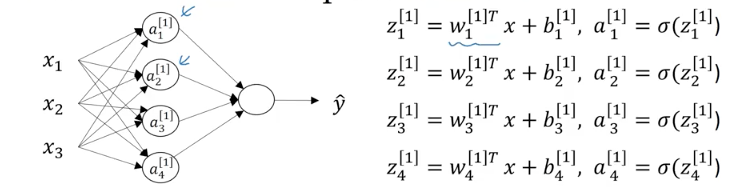

In [4]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-10-31 at 2.56.27 PM.png')



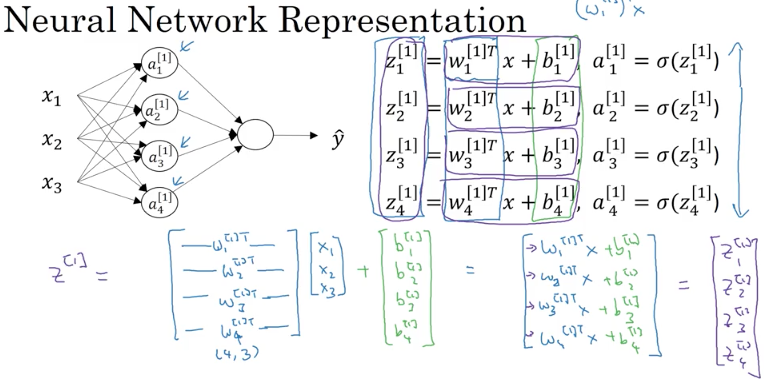

In [6]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-10-31 at 2.58.07 PM.png')



# Vectorizing Across Multiple Example
- will use square and round brackets to refer to layer and exmaple. Lower subscipt refers to the node.

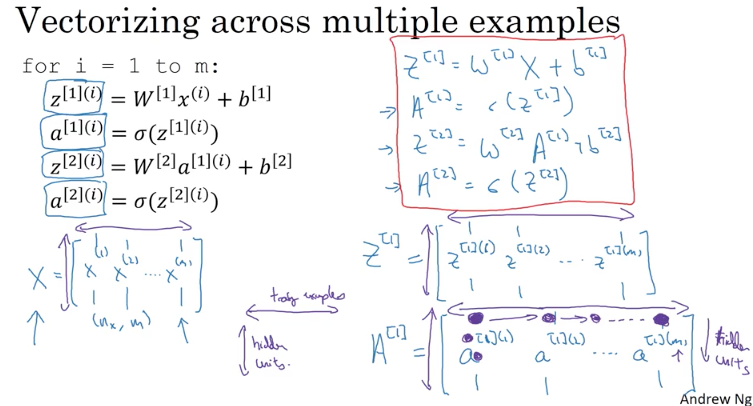

In [8]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-10-31 at 3.19.27 PM.png')

# Explanation of Vectorized Implementation
- wx will give column vectors for each training example
- then you have a bunch of columns of training examples as z and a

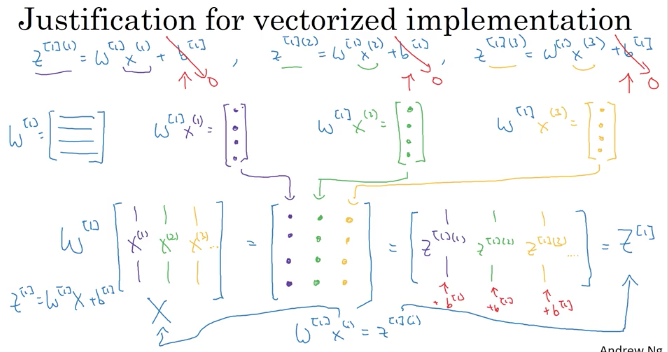

In [10]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-10-31 at 3.25.45 PM.png')

# Activation functions
- used sigmoid functions can use other activation functions can use g(z) 
- use hyperbolic tangent function, goes from -1 to +1
- if you let g(z) be tanh, have zero mean, it is easier and centers the data, makes learning for next layer easier
- NEVER use signmoid function anymore, always use the tanh
- may have tanh for hidden layer and sigmoid for binary output layer
- need to differentiate which g is being used
- one downside is that if z is very large or slow, slope is zero, which slows down gradient descent
- rules of thumb
- if binary classification, use sigmois
- ReLU recified linear unit is most popular, but bad when z is negative, also tanh can work but bad if z are high


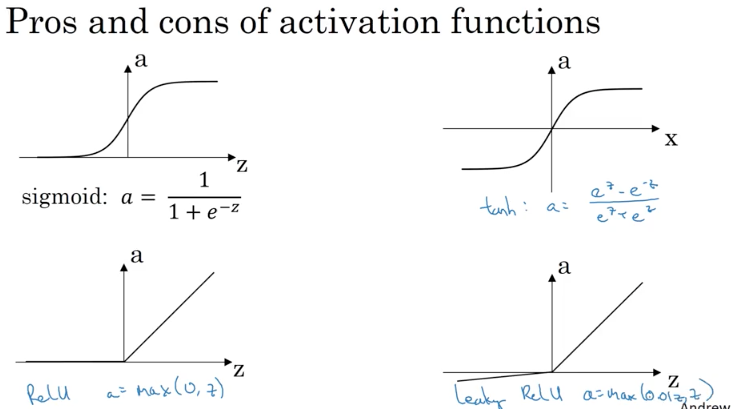

In [12]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-10-31 at 3.55.08 PM.png')

# Why do you need non linear activation function
- g(z) =z linear actiation function
- if you do this, then a1 = z1
- if you use linear activation, then there is no point in having any layers, bc final output is still linear, it is useless
- only place you would use a linear function is in case of linear regression in y, so that your output is linear, but hidden should use reLU or tanh. 

# Derivatives of Activation Functions
- 1. sigmoid activation function
- $$G(x) = \frac{1}{1+e^{-z}}$$
- Derivative is 
-$$G'(x) = \frac{1}{1+e^{-z}}(1-\frac{1}{1+e^{-z}})$$
- do a sanity check where z is high, g' goes to zero
- you might see g'(z) = a(1-a)

- 2. tanh activation function

- $$g(Z) = tanh(z)=\frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}$$

- $$g'(z) = 1-(tanh(z))^{2}$$

- 3. ReLU and Leaky Relu
<br>
- Relu
- g(z) = max(0, z)
- g'(z) = 0 if z < 0 
- g'(z) = 1 if z > 0
- if z is zero, might be undefined, or one or the other
<br>
- Leaky ReLU
- g(z) = max(0.01z, z)
- g'(z) = 0.01 if z < 0
- g'(z) = 1 if z >0
<br>
- g(z) = max(0.01z, z)
- g'(z) = 0.01 if z <0 
- g'(Z) = 1 if z > 0

# Gradient Descent for Neural Network
- Parameters: $$w^{[1]},b^{[1]},w^{[2]},b^{[2]}$$
- number of units: $$n^{[0]},n^{[1]},n^{[2]}=1$$
- Dimension of parameters $$w^{[1]} = (n^{[1]},n^{[0]}), b^{[1]} = (n^{[1]},1), w^{[2]} = (n^{[2]},n^{[1]}), b^{[2]} = (n^{[2]},1)$$ 
- Cost Function : - $$J(w^{[1]},b^{[1]},w^{[2]},b^{[2]}) = \frac{1}{m}\sum_{i=1}^{m}L(\hat{y^{i}},y^{i})$$
- Gradient Descent:
- Repeat {Compute Predicts $$\hat{y^{i}}$$
- $$dw^{[1]}= \frac{\partial J}{\partial w^{[1]}} $$
- $$db^{[1]}= \frac{\partial J}{\partial b^{[1]}} $$ and so on
- $$w^{[1]} := w^{[1]} - \alpha dw^{[1]}$$
- $$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$
- repeat until the parameters start to converge
- Formulas for forward propagation:
- $$z^{[1]}= w^{[1]}x + b^{[1]} $$
- $$A^{[1]}= g^{[1]}(z^{[1]}) $$
- $$z^{[2]}= w^{[2]}x + b^{[2]} $$
- $$A^{[2]}= g^{[2]}(z^{[2]}) $$
- Formulas for back propagation:
- $$dz^{[2]}= A^{[2]}-Y $$
- $$dw^{[2]}= \frac{1}{m}dz^{[2]}A^{[1]} $$
- $$db^{[2]}= \frac{1}{m}np.sum(dz^{[2]}, axis =1, keepdims=True) $$
- $$dz^{[1]}= dw^{[2]T}dz^{[2]}*g^{[1]'}(z^{[1]}) $$
- will be elementwise n1, m matrix
- $$dw^{[1]}= \frac{1}{m}dz^{[1]}X^{T} $$
- $$db^{[1]}= \frac{1}{m}np.sum(dz^{[1]}, axis =1, keepdims=True) $$



# Backpropogation
- how to calculate dz
- then can calculate dw and db
- now we do calculation multiple times, instead of once
- will have more steps

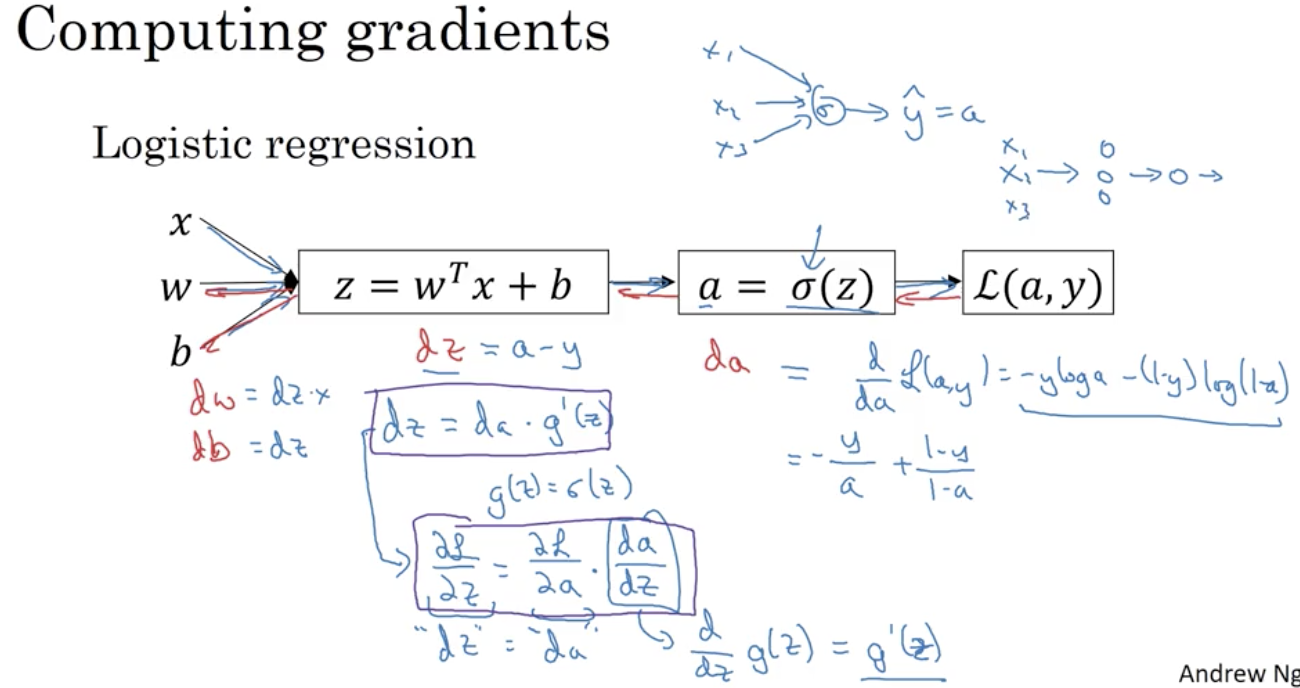

In [1]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-11-10 at 9.01.03 AM.png')

- for two in netowrk, need to calculate da, dz and dw for each 
- derivatives have same dimension of non derivatives

- we want to vectorize across several examples with equations
- use a vectorized implementation:

- use vectorized equations
- how to initialize the weights, randomly initialize, not to zero. 

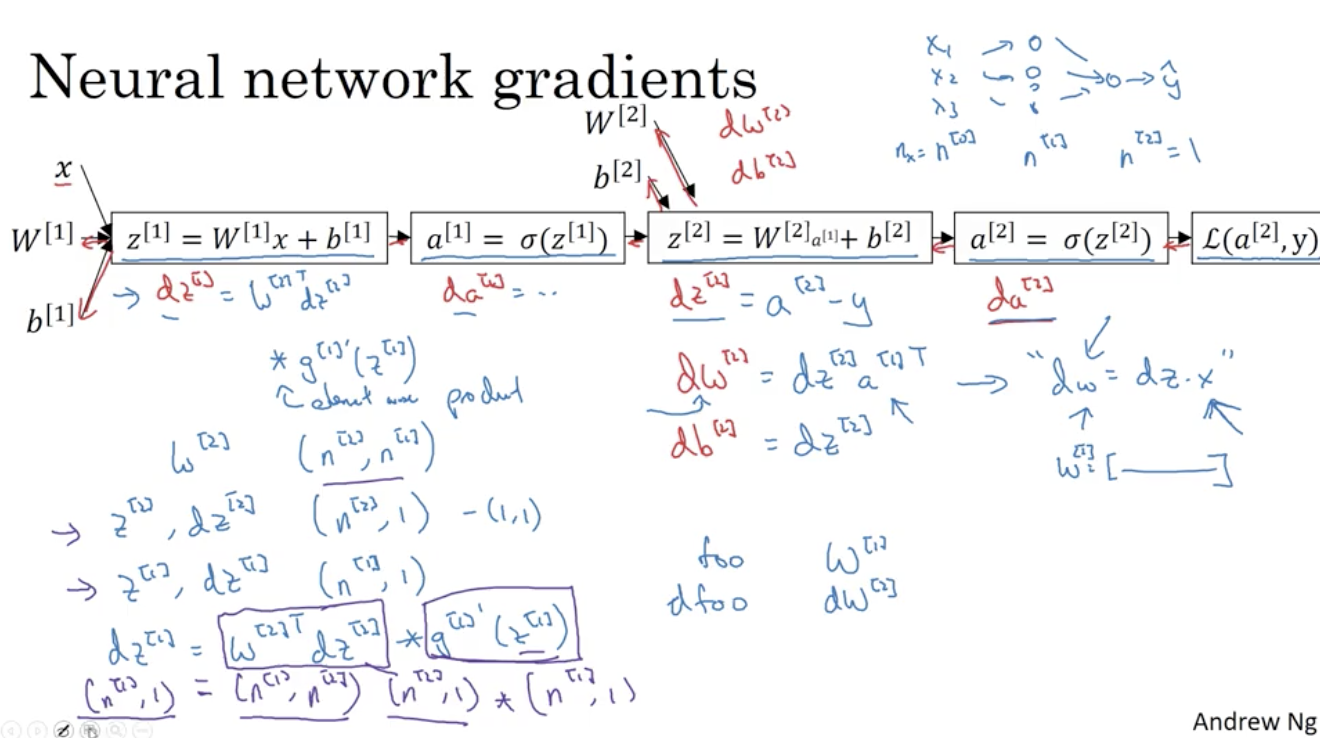

In [3]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-11-10 at 9.05.04 AM.png')

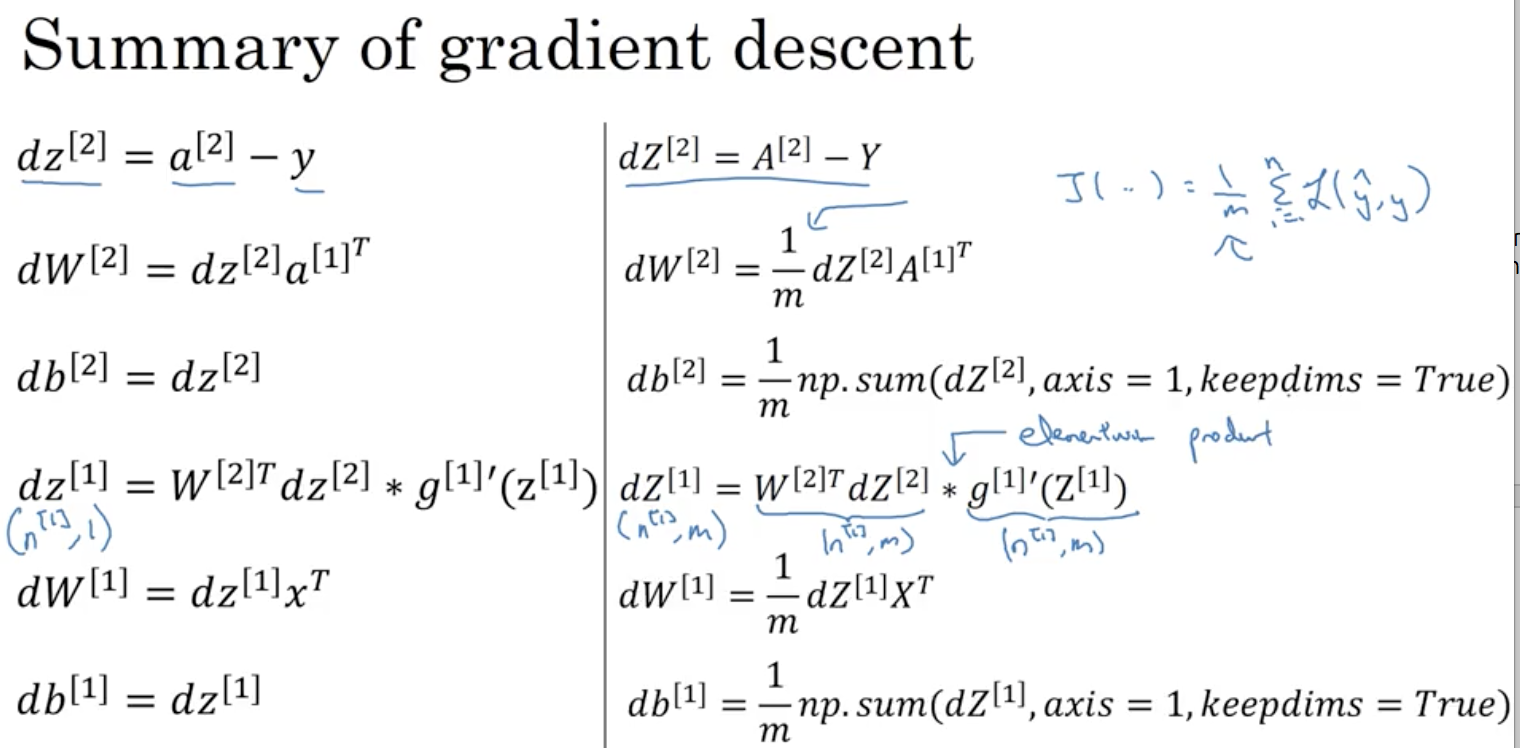

In [5]:
from IPython.display import Image
Image(filename='Desktop/ProfessionalDevelopment/NeuralNetworks/Screen Shot 2017-11-10 at 9.39.58 AM.png')

# Random Initialization
- for logisitic regression you can initialize with zero
- but will not work if you initialize with 0 here
- if w is 2x2 0 matrix, and b is 0 matrix
- initializing b to 0 is ok
- for any example, will then have that a1 and a2 are the same
- when you do backpropagation
- then dz1 = dz2
- then completely symmetric, computing same function, after optimization will continue computing the same function
- when you perform weight update
- do random initalization

- w1 = np.random.randn((2,2)) * 0.01 , want small random values, bc if using tanh or sigmoid activation, if weights are too large, then will slow down the learning, if doing binary classification, don't want initial parameters to be too large
- b1 = np.zero((2,1))
- w2 = ...random
- b2 = 0
- if just one hidden layer, shallow netowrk, 0.01 is ok
- but if deep neural network, want different constant




In [9]:
import numpy as np
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)
A
B

array([[ 2.42756236],
       [-0.81241424],
       [ 0.72787154],
       [-0.06019955]])

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.